# homework-lec10 Zhangl-1701110221 

In [1]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt

def func_theo(u0,t0,te,t):
    u = np.sqrt(u0**2+((t-t0)/te)**2)
    A = (u**2+2)/(u*np.sqrt(u**2+4))
    return A

def func_LH(u0,t0,te,mag0,t,sig):
    LH = np.exp(-(np.sum((-2.5*np.log10(func_theo(u0,t0,te,t))+mag0-mag)**2/(sig**2))/(172-4)))
    return LH

data = ascii.read('light_curve.csv')
time = data['time'] - 2457900
mag = data['mag']
sigma = data['sigma']

RR = []

u0_m = np.random.random_sample(20)/20 + 0.075
t0_m = np.random.random_sample(20)*3 + 160
te_m = np.random.random_sample(20) + 27
mag0_m = np.random.random_sample(20) + np.mean(mag[:10])

index = 1
while (index == 1):
    u0 = np.array([[]])
    t0 = np.array([[]])
    te = np.array([[]])
    mag0 = np.array([[]])
#    index2 = 1
    for i in range(0,len(u0_m)):
        u0_l = []
        t0_l = []
        te_l = []
        mag0_l = []
        u00 = u0_m[i]
        t00 = t0_m[i]
        te0 = te_m[i]
        mag00 = mag0_m[i]
        while(len(u0_l) != 50):
            LH = func_LH(u00,t00,te0,mag00,time,sigma)
            u0i = np.random.normal(u00, 0.01, 1)
            t0i = np.random.normal(t00, 1, 1)
            tei = np.random.normal(te0, 0.5, 1)
            mag0i = np.random.normal(mag00, 0.1, 1)
            LHi = func_LH(u0i,t0i,tei,mag0i,time,sigma)
            if (LHi > LH):
                u00 = u0i[0]
                t00 = t0i[0]
                te0 = tei[0]
                mag00 = mag0i[0]
                u0_l.append(np.abs(u00))
                t0_l.append(t00)
                te_l.append(te0)
                mag0_l.append(mag00)
            if(len(u0_l)==50):
                if(len(u0[0]) == 0):
                    u0 = np.concatenate((u0,np.array([u0_l][-30:])), axis=1)
                    t0 = np.concatenate((t0,np.array([t0_l][-30:])), axis=1)
                    te = np.concatenate((te,np.array([te_l][-30:])), axis=1)
                    mag0 = np.concatenate((mag0,np.array([mag0_l][-30:])), axis=1)
                    break
                else:
                    u0 = np.concatenate((u0,np.array([u0_l][-30:])), axis=0)
                    t0 = np.concatenate((t0,np.array([t0_l][-30:])), axis=0)
                    te = np.concatenate((te,np.array([te_l][-30:])), axis=0)
                    mag0 = np.concatenate((mag0,np.array([mag0_l][-30:])), axis=0)
                    break
            if (LHi < LH):
                ind = np.random.random_sample()
                if (LHi > ind*LH):
                    u00 = u0i[0]
                    t00 = t0i[0]
                    te0 = tei[0]
                    mag00 = mag0i[0]
                    u0_l.append(np.abs(u00))
                    t0_l.append(t00)
                    te_l.append(te0)
                    mag0_l.append(mag00)
                if(len(u0_l)==50):
                    if(len(u0[0]) == 0):
                        u0 = np.concatenate((u0,np.array([u0_l][-30:])), axis=1)
                        t0 = np.concatenate((t0,np.array([t0_l][-30:])), axis=1)
                        te = np.concatenate((te,np.array([te_l][-30:])), axis=1)
                        mag0 = np.concatenate((mag0,np.array([mag0_l][-30:])), axis=1)
                        break
                    else:
                        u0 = np.concatenate((u0,np.array([u0_l][-30:])), axis=0)
                        t0 = np.concatenate((t0,np.array([t0_l][-30:])), axis=0)
                        te = np.concatenate((te,np.array([te_l][-30:])), axis=0)
                        mag0 = np.concatenate((mag0,np.array([mag0_l][-30:])), axis=0)
                        break
    m = len(u0_m)
    n = len(u0[0])
    print(m,n)
    ave = np.array(list(map(lambda x: np.mean(x), u0)))
    dev = np.array([u0[0] - ave[0]])
    for j in range(1,len(ave)):
        dev = np.concatenate((dev,np.array([u0[j] - ave[j]])), axis=0)
    B = (n/(m-1))*np.sum((ave - np.mean(u0))**2)
    print(B)
    W = np.sum(dev**2)/(m*(n-1))
    print(W)
    R = ((1-1/n)*W + B/n)/W
    RR.append(R)
    print(RR)
    break

NameError: name 'u0_0' is not defined

In [2]:
m = len(u0_m)
n = len(u0[0])
print(m,n)
ave = np.array(list(map(lambda x: np.mean(x), u0)))
dev = np.array([u0[0] - ave[0]])
for j in range(1,len(ave)):
    dev = np.concatenate((dev,np.array([u0[j] - ave[j]])), axis=0)
B = (n/(m-1))*np.sum((ave - np.mean(u0))**2)
print(B)
W = np.sum(dev**2)/(m*(n-1))
print(W)
R = ((1-1/n)*W + B/n)/W
RR.append(R)
print(RR)

20 50
0.000409321861363
5.95143449666e-05
[1.1175540171339799]


fitting of u0:   0.092 +/- 0.00813
fitting of t0:   158.838 +/- 0.40054
fitting of te:   26.842 +/- 1.46096
fitting of mag0: 14.133 +/- 0.07191


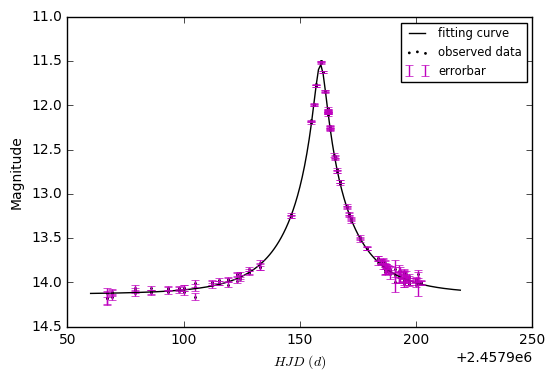

In [3]:
u02s = np.mean(u0)
t02s = np.mean(t0)
te2s = np.mean(te)
mag02s = np.mean(mag0)
sig_u02s  = np.std(u0)
sig_t02s  = np.std(t0)
sig_te2s  = np.std(te)
sig_mag02s = np.std(mag0)
print('fitting of u0:   %.3f +/- %.5f'%(u02s,sig_u02s))
print('fitting of t0:   %.3f +/- %.5f'%(t02s,sig_t02s))
print('fitting of te:   %.3f +/- %.5f'%(te2s,sig_te2s))
print('fitting of mag0: %.3f +/- %.5f'%(mag02s,sig_mag02s))
t = np.arange(60,220,1)
mag_theo = -2.5*np.log10(func_theo(u02s,t02s,te2s,t))+mag02s
plt.scatter(time + 2457900,mag,s=1,c='m',label = 'observed data')
plt.plot(t + 2457900,mag_theo,'k',label = 'fitting curve')
plt.errorbar(time + 2457900,mag,sigma,c='m',ls='none',label = 'errorbar')
plt.xlabel('$HJD\ (d)$')
plt.ylabel('Magnitude')
plt.legend(fontsize='small')
plt.gca().invert_yaxis()
plt.show()

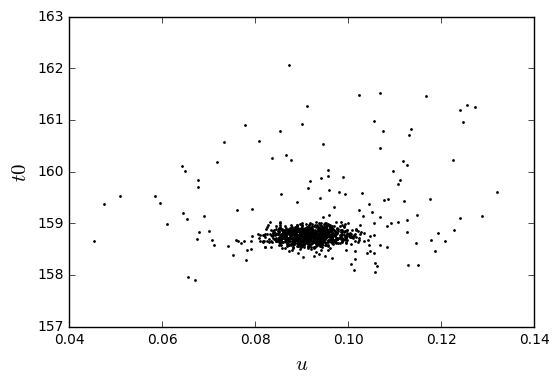

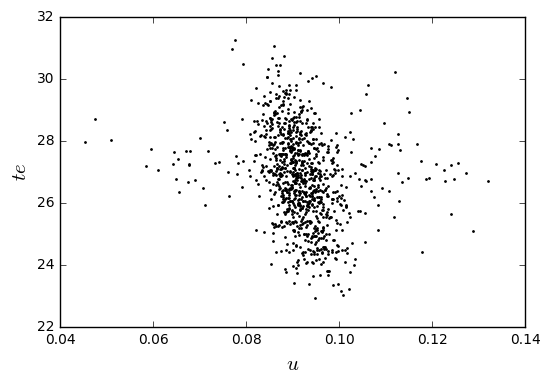

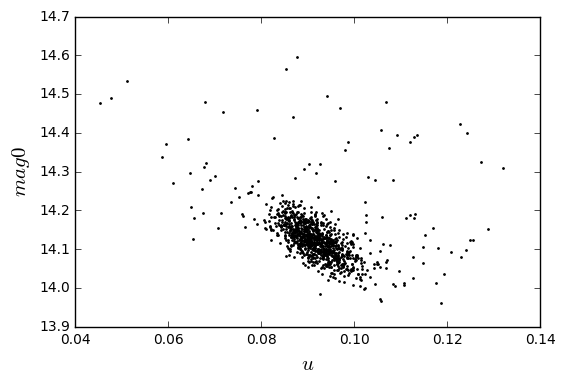

In [4]:
for i in range(0,len(u0)):
    plt.scatter(u0[i],t0[i],s=1,c='k')
    plt.xlabel('$u$',fontsize=15)
    plt.ylabel('$t0$',fontsize=15)
plt.show()
for i in range(0,len(u0)):
    plt.scatter(u0[i],te[i],s=1,c='k')
    plt.xlabel('$u$',fontsize=15)
    plt.ylabel('$te$',fontsize=15)
plt.show()
for i in range(0,len(u0)):
    plt.scatter(u0[i],mag0[i],s=1,c='k')
    plt.xlabel('$u$',fontsize=15)
    plt.ylabel('$mag0$',fontsize=15)
plt.show()

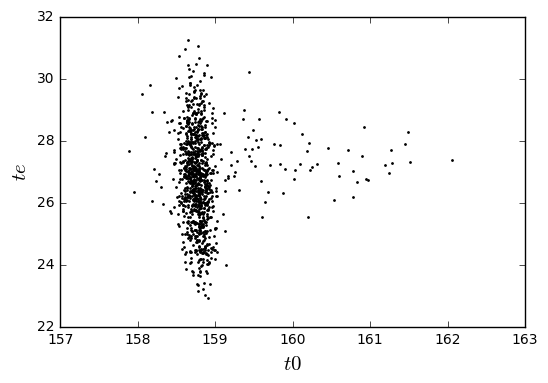

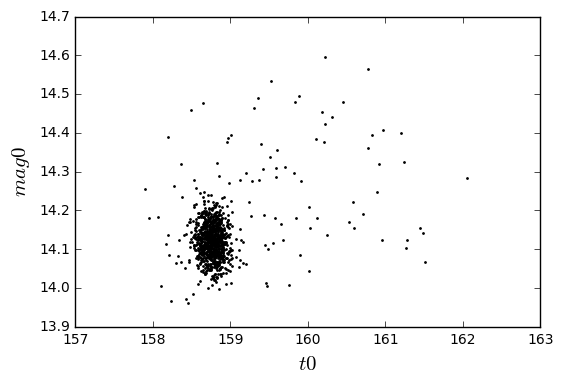

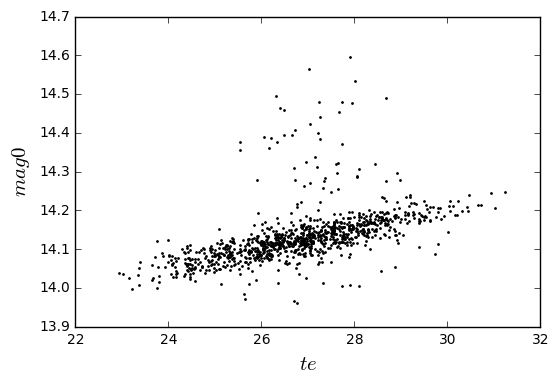

In [5]:
for i in range(0,len(t0)):
    plt.scatter(t0[i],te[i],s=1,c='k')
    plt.xlabel('$t0$',fontsize=15)
    plt.ylabel('$te$',fontsize=15)
plt.show()
for i in range(0,len(t0)):
    plt.scatter(t0[i],mag0[i],s=1,c='k')
    plt.xlabel('$t0$',fontsize=15)
    plt.ylabel('$mag0$',fontsize=15)
plt.show()
for i in range(0,len(te)):
    plt.scatter(te[i],mag0[i],s=1,c='k')
    plt.xlabel('$te$',fontsize=15)
    plt.ylabel('$mag0$',fontsize=15)
plt.show()

In [ ]:
count = 1
while (index == 1):
    u0_m = np.array(list(map(lambda x: x[-1], u0)))
    t0_m = np.array(list(map(lambda x: x[-1], t0)))
    te_m = np.array(list(map(lambda x: x[-1], te)))
    mag0_m = np.array(list(map(lambda x: x[-1], mag0)))
    u0 = np.array([[]])
    t0 = np.array([[]])
    te = np.array([[]])
    mag0 = np.array([[]])
#    index2 = 1
    for i in range(0,len(u0_m)):
        u0_l = []
        t0_l = []
        te_l = []
        mag0_l = []
        u00 = u0_m[i]
        t00 = t0_m[i]
        te0 = te_m[i]
        mag00 = mag0_m[i]
        while(len(u0_l) != 50):
            LH = func_LH(u00,t00,te0,mag00,time,sigma)
            u0i = np.random.normal(u00, 0.001, 1)
            t0i = np.random.normal(t00, 0.01, 1)
            tei = np.random.normal(te0, 0.01, 1)
            mag0i = np.random.normal(mag00, 0.01, 1)
            LHi = func_LH(u0i,t0i,tei,mag0i,time,sigma)
            if (LHi > LH):
                u00 = u0i[0]
                t00 = t0i[0]
                te0 = tei[0]
                mag00 = mag0i[0]
                u0_l.append(np.abs(u00))
                t0_l.append(t00)
                te_l.append(te0)
                mag0_l.append(mag00)
            if(len(u0_l)==30):
                if(len(u0[0]) == 0):
                    u0 = np.concatenate((u0,np.array([u0_l])), axis=1)
                    t0 = np.concatenate((t0,np.array([t0_l])), axis=1)
                    te = np.concatenate((te,np.array([te_l])), axis=1)
                    mag0 = np.concatenate((mag0,np.array([mag0_l])), axis=1)
                    break
                else:
                    u0 = np.concatenate((u0,np.array([u0_l])), axis=0)
                    t0 = np.concatenate((t0,np.array([t0_l])), axis=0)
                    te = np.concatenate((te,np.array([te_l])), axis=0)
                    mag0 = np.concatenate((mag0,np.array([mag0_l])), axis=0)
                    break
            if (LHi < LH):
                ind = np.random.random_sample()
                if (LHi > ind*LH):
                    u00 = u0i[0]
                    t00 = t0i[0]
                    te0 = tei[0]
                    mag00 = mag0i[0]
                    u0_l.append(np.abs(u00))
                    t0_l.append(t00)
                    te_l.append(te0)
                    mag0_l.append(mag00)
                if(len(u0_l)==30):
                    if(len(u0[0]) == 0):
                        u0 = np.concatenate((u0,np.array([u0_l])), axis=1)
                        t0 = np.concatenate((t0,np.array([t0_l])), axis=1)
                        te = np.concatenate((te,np.array([te_l])), axis=1)
                        mag0 = np.concatenate((mag0,np.array([mag0_l])), axis=1)
                        break
                    else:
                        u0 = np.concatenate((u0,np.array([u0_l])), axis=0)
                        t0 = np.concatenate((t0,np.array([t0_l])), axis=0)
                        te = np.concatenate((te,np.array([te_l])), axis=0)
                        mag0 = np.concatenate((mag0,np.array([mag0_l])), axis=0)
                        break
    m = len(u0_0)
    n = len(u0[0])
    print(m,n)
    ave = np.array(list(map(lambda x: np.mean(x), u0)))
    dev = np.array([u0[0] - ave[0]])
    for j in range(1,len(ave)):
        dev = np.concatenate((dev,np.array([u0[j] - ave[j]])), axis=0)
    B = (n/(m-1))*np.sum((ave - np.mean(u0))**2)
    print(B)
    W = np.sum(dev**2)/(m*(n-1))
    print(W)
    R = ((1-1/n)*W + B/n)/W
    RR.append(R)
    print(R)
    print(count)
    count = count + 1
    if(R < 1.2):
#    if((count > 15) or (R < 1.2)):
        break

In [ ]:
u02s = np.mean(u0)
t02s = np.mean(t0)
te2s = np.mean(te)
mag02s = np.mean(mag0)
sig_u02s  = np.std(u0)
sig_t02s  = np.std(t0)
sig_te2s  = np.std(te)
sig_mag02s = np.std(mag0)
print('fitting of u0:   %.3f +/- %.5f'%(u02s,sig_u02s))
print('fitting of t0:   %.3f +/- %.5f'%(t02s,sig_t02s))
print('fitting of te:   %.3f +/- %.5f'%(te2s,sig_te2s))
print('fitting of mag0: %.3f +/- %.5f'%(mag02s,sig_mag02s))
t = np.arange(60,220,1)
mag_theo = -2.5*np.log10(func_theo(u02s,t02s,te2s,t))+mag02s
plt.scatter(time + 2457900,mag,s=1,c='m',label = 'observed data')
plt.plot(t + 2457900,mag_theo,'k',label = 'fitting curve')
plt.errorbar(time + 2457900,mag,sigma,c='m',ls='none',label = 'errorbar')
plt.xlabel('$HJD\ (d)$')
plt.ylabel('Magnitude')
plt.legend(fontsize='small')
plt.gca().invert_yaxis()
plt.show()

In [5]:
np.savetxt('parameters_u0.txt',u0)
np.savetxt('parameters_t0.txt',t0)
np.savetxt('parameters_te.txt',te)
np.savetxt('parameters_mag0.txt',mag0)

In [ ]:
for i in range(0,len(u0)):
    plt.scatter(u0[i],t0[i],s=1,c='k')
    plt.xlabel('$u$',fontsize=15)
    plt.ylabel('$t0$',fontsize=15)
plt.show()
for i in range(0,len(u0)):
    plt.scatter(u0[i],te[i],s=1,c='k')
    plt.xlabel('$u$',fontsize=15)
    plt.ylabel('$te$',fontsize=15)
plt.show()
for i in range(0,len(u0)):
    plt.scatter(u0[i],mag0[i],s=1,c='k')
    plt.xlabel('$u$',fontsize=15)
    plt.ylabel('$mag0$',fontsize=15)
plt.show()

In [ ]:
for i in range(0,len(t0)):
    plt.scatter(t0[i],te[i],s=1,c='k')
    plt.xlabel('$t0$',fontsize=15)
    plt.ylabel('$te$',fontsize=15)
plt.show()
for i in range(0,len(t0)):
    plt.scatter(t0[i],mag0[i],s=1,c='k')
    plt.xlabel('$t0$',fontsize=15)
    plt.ylabel('$mag0$',fontsize=15)
plt.show()
for i in range(0,len(te)):
    plt.scatter(te[i],mag0[i],s=1,c='k')
    plt.xlabel('$te$',fontsize=15)
    plt.ylabel('$mag0$',fontsize=15)
plt.show()